## Logistic Regression (1D example)

<span style="color:red">**Please note the HINTS printed in red color**</span>

In this example we have only one variable $x$. The parameter vector is $\boldsymbol\theta=\left(\theta_0,\theta_1\right)$.

Analogously to the exercises before, the code snippets in this notebook contain several gaps, which should be completed by you. 
The precise location of the gap is indicated by the expression *MY CODE*.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn

Consider the case, random numbers are created by two different gaussian distributions with identical variance and we also know the labels from which distribution each random number was originating from.

In [2]:
a=np.random.normal(5,0.7,100)
print (a)

[5.88243035 5.03160961 5.88963825 4.48770923 5.22359224 5.1537672
 4.70546514 5.59380221 4.10872945 5.48631368 4.16810838 5.25124832
 5.82071436 5.75862331 5.71023285 5.582767   4.80479701 5.32970841
 3.97822926 5.65146914 5.12006867 4.5067989  4.94598497 4.28024157
 3.9586015  3.99445527 6.92637687 4.65200587 4.07250624 5.40658845
 4.80703967 5.25258013 4.16493291 3.67706311 4.67240562 4.56092475
 5.57555222 4.65701633 4.1571061  4.23272114 5.07080564 5.44024776
 6.48789383 4.70660764 6.47501754 4.84916264 5.26406204 5.01393145
 4.66570266 3.4954732  5.73004392 5.11778432 4.83241218 4.74386171
 4.52275406 5.14261278 5.9480468  5.54747601 7.13211596 4.75845446
 5.80289621 4.41228058 5.54515707 3.84461456 4.88517172 5.83727279
 5.90996009 4.15005548 5.71848627 5.50414999 3.1497211  5.73510957
 4.0815177  6.0980459  3.08288316 5.56759658 4.56950105 4.14715783
 4.84096997 4.35139668 5.96180504 5.5895523  4.9044736  4.58961261
 5.08204655 5.19900698 4.27436569 5.92605505 5.48374605 5.08014

In [3]:
b=np.random.normal(2,0.7,100)
print(b)

[2.37073921 2.64550283 2.68640087 2.54438463 2.00758926 1.50223151
 3.04946479 1.03764693 2.59464379 1.40886403 1.2076565  0.8992017
 0.96271675 2.75834739 1.82571841 2.39088512 1.49993324 2.23329086
 0.74333619 2.34590411 2.0985901  1.70379025 2.27775159 2.19087127
 2.01119157 1.94279672 1.9706122  0.94216063 2.37606924 2.01747358
 0.83465721 1.62286683 1.5315306  2.50640541 2.08408244 2.37859601
 1.21682659 2.56612321 2.57316886 1.54435241 3.58620091 3.01569201
 1.49730869 1.77374968 1.31004739 2.08570174 2.75934709 0.77079957
 2.60326439 2.7638039  1.10657311 2.73671462 2.50310223 2.80651162
 2.352652   1.54664867 2.35003989 1.91291448 1.55080322 2.27827364
 1.26566844 2.94292093 2.11080565 2.05224426 1.52271003 3.33870058
 2.18130776 1.13624438 1.62848085 1.35081988 1.82353174 1.21168471
 1.89162074 2.24190775 1.93464389 1.50297957 1.64404669 1.51854745
 2.039633   2.38180259 1.80508852 0.59978743 1.2389929  2.30109105
 1.67691244 1.65838034 2.97265678 1.78815894 2.20564    2.07150

We plot both type of points in a common diagram, where the points generated by the first distribution are plotted in orange at y=1, while the points of the second distribution are plotted in blue at y=0.

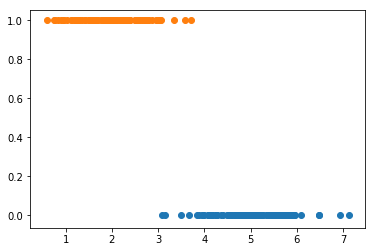

In [4]:
zeros=[0]*100
ag=np.column_stack((zeros,a))
ones=[1]*100
bg=np.column_stack((ones,b))
plt.scatter(a,zeros)
plt.scatter(b,ones)
plt.show()

Now we would like to determine, if an arbitrary previously unseen point belongs rather to class $y=0$ or to class $y=1$. For that, we want to employ logistic regression. Similar to linear regression, we firt consider a model with a single independent variable $x$ and two bias parameters $\theta_0,\theta_1$.

The probability, that $x$ belongs to either of the two classes is determined using the logistic function

$$
  \sigma(x) = \frac{1}{1+\exp(-x\theta_1-\theta_0)}
$$

<span style="color:red">Hint: use the the function $\texttt{math.exp}$</span>

In [5]:
def logistic_function(x,b0,b1):
    return 1.0/(*YOUR_CODE*)

SyntaxError: invalid syntax (<ipython-input-5-89da463b0e90>, line 2)

For applying gradient descent, we define the two gradients. First the partial derivative with respect to $\theta_0$ (the first component of the gradient)

In [ ]:
def gradient0(X,y,theta0,theta1):
    num_rows=X.shape[0]
    s=0.0
    for i in range(0,num_rows):
        s=s+(logistic_function(X[i],theta0,theta1)-y[i])
    return s
    

Then the partial derivative with respect to $\theta_1$ (the second component of the gradient)

<span style="color:red">Hint: there is only one small difference to $\texttt{gradient0}$. For Details study Slides on Logistic Regression p23/34 (last line)</span>

In [ ]:
def gradient1(X,y,theta0,theta1):
    *YOUR CODE* Note that the function gradient1 is not identical with gradient0 !

The cost function $J(\boldsymbol\theta)$, where $\boldsymbol\theta=\left(\theta_0,\theta_1\right)$ is given by

$$
    J(\boldsymbol\theta) =
      - \frac{1}{n} \sum_{i=1}^n%
        \left[y_i\log h(\boldsymbol\theta,\mathbf{X_i})
            + (1-y_i)\log\left(
               1-h(\boldsymbol\theta,\mathbf{X_i})\right)\right]
$$

where $h(\boldsymbol\theta,\mathbf{X_i})=\sigma\left(\mathbf{X_i}^T\boldsymbol\theta\right)=\sigma\left(\theta_0+\theta_1 x\right)$ and $\sigma$ is the sigmoid function.

<span style="color:red">Hint: The cost function of Logistic Regression is given on slide p20/34. For the log-function use $\texttt{math.log}$. Don't forget to divide by $\texttt{num_rows}$ which is equal to $\texttt{X.shape[0]}$.</span>

In [ ]:
def cost_function(X,y,theta0,theta1):
    num_rows=X.shape[0]
    s=*YOUR CODE *
    for i in range(0,*YOUR CODE*):
        logit=*YOUR CODE*(X[i],*YOUR CODE*)
        s=s+Y[i]*YOUR CODE*
    return *YOUR CODE*

To fit our logistic regression model, we combine the vectors a and b in one vector

In [ ]:
X=np.concatenate((a,b))
print(X)

Analogously, we build our vector y

In [ ]:
y=np.concatenate((zeros,ones))
print(y)

Now we are ready to determine the optimal values for the parameters $\theta_0$ and $\theta_1$.

We set the initial values to 1

In [ ]:
theta0=1.0
theta1=1.0

Define the learning rate $\alpha$

In [ ]:
alpha=0.001

Lets do 1000 iterations

In [ ]:
num_iterations=1000

In [ ]:
for i in range(0,num_iterations):
    gr0=gradient0(X,y,theta0,theta1)
    gr1=gradient1(X,y,theta0,theta1)
    costs=cost_function(X,y,theta0,theta1)
    print ("current costs: ",costs)
    print ("current parameters: ",theta0,",",theta1)
    theta0=theta0-alpha*gr0
    theta1=theta1-alpha*gr1
    

The decision boundary is given by the x such that: $-\theta_0-\theta_1 x=0$ 

We can solve this equation for x: $x=-\frac{\theta_0}{\theta_1}$
Now let us plot the decision boundary and the logistic function

In [ ]:
ts = np.arange(-1.0, 7.0, 0.01)
fs=[]
for t in ts:
    s = logistic_function(t,theta0,theta1)
    fs.append(s)
    
# plot the decision boundary
plt.axvline(*YOUR CODE*)

# plot the logistic function with the parameters determined by gradient descent
plt.plot(ts, fs)  
plt.scatter(a,zeros)
plt.scatter(b,ones)

# Logistic Regression (Real World Example)

Now we want to conduct a logistic regression with multiple independent variables.  For that, we load a dataset for skin eczemas.

In [ ]:
df=pd.read_csv("skin_disease.csv")

In [ ]:
df


We remap the class values where 255 is mapped to 1 (eczema) and 1 to 0 (no eczema)
Since the old and new value range overlap (1 occurs in both). We have to remap the values in two steps.

In [ ]:
df[df["class"]==255]

In [ ]:
di = {1: 0, 255: 2}
df=df.replace({"class": di})
df[df["class"]==2]

In [ ]:
di = {2: 1}
df=df.replace({"class": di})
df[df["class"]==1]

We remove the coordinates x,y  and the fields expertsEczemaVotePatch, expertsEczemaAllVotePatch and  expertsEczemaVoteCenterPixel from the dataset. The last three attributes are all derived from the expert labelling and must therefore not be used as features.


In [ ]:

del df["x"]
del df["y"]
del df["expertsEczemaVotePatch"]
del df["expertsEczemaAllVotePatch"]
del df["expertsEczemaVoteCenterPixel"]

we split the data into training and test set

In [ ]:
train, test = train_test_split(df, test_size=0.2)

Independent and dependent variables are separated

In [ ]:

X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)

y_train = train["class"]
y_test = test["class"]

X_train

we create the logistic regression object by instantiate the appropriate sklearn class

<span style="color:red">Hint: use $\texttt{help(sklearn.linear_model)}$; You can also use google with "sklearn" "logistic" "regression" "example" (all 4 words without quotes and then find https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a</span>

In [ ]:
logReg=*YOUR CODE*

and fit the model to the variables <span style="color:red">using something like $\texttt{logReg.fit(...,...)}$</span>

In [ ]:
*YOUR CODE*

We then apply the model to the test data

In [ ]:
predictions=logReg.predict(X_test)

As evaluation metrics we use accuracy and F1-Score <span style="color:red">using something like $\texttt{sklearn.metrics.accuracy_score(...,...)}$ and $\texttt{sklearn.metrics.f1_score(...,...)}$</span>

In [ ]:
accuracy=*YOUR CODE*
fscore=*YOUR CODE*

Finally, both metrics should be printed out

In [ ]:
print ("accuracy: ",accuracy)
print ("f1 score: ",fscore)